# Import

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import src.workfile_functions as wf

In [2]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Don't wrap to new lines

In [3]:
df = pd.read_csv('../data/RR2/diabetic_data.csv')

In [4]:
ids = pd.read_csv('../data/RR2/IDS_mapping.csv',header=None)

In [5]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
# this is a weird table with 3 tables in it
ids.head()

,0,1
0,admission_type_id,description
1,1,Emergency
2,2,Urgent
3,3,Elective
4,4,Newborn


In [7]:
len(ids)

68

## Readmission (target $y$)

In [8]:
df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

#### Checkpoint 1

In [49]:
# checkpoint 1
# df_copy_1 = wf.checkpoint(df, existing_copy=globals().get('df_copy_1'))


Do you want to save a copy of the DataFrame?


Press 'y' to confirm, or any other key to skip:  y


DF Saved.


In [50]:
# df = df_copy_1.copy(deep=True)

In [9]:
# create a binary 0-1 for early readmittance
df['readmit_early'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# create a binary 0-1 for any readmittance
df['readmit_at_all'] = df['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)

In [10]:
df[['readmit_early','readmit_at_all']].value_counts()

readmit_early  readmit_at_all
0              0                 54864
               1                 35545
1              1                 11357
dtype: int64

In [11]:
df.drop('readmitted',axis=1,inplace=True)

In [12]:
df.head(3)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmit_early,readmit_at_all
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,0
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,1
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,0


# Data Cleaning

## NULLS

In [13]:
# count instances of '?' which is this data's version of NULL
wf.count_values(df,'?')

Column                                 ? Count    % of Rows
------------------------------------------------------------
weight                                  98,569       96.86%
medical_specialty                       49,949       49.08%
payer_code                              40,256       39.56%
race                                     2,273        2.23%
diag_3                                   1,423        1.40%
diag_2                                     358        0.35%
diag_1                                      21        0.02%


In [14]:
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [15]:
df = df[(df['race']!='?')]

In [16]:
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [17]:
df['gender'].value_counts()

Female             53575
Male               45917
Unknown/Invalid        1
Name: gender, dtype: int64

In [18]:
df = df[(df['gender']!='Unknown/Invalid')]
df['gender'].value_counts()

Female    53575
Male      45917
Name: gender, dtype: int64

#### Checkpoint 2

In [19]:
# checkpoint 2
# df_copy_2 = wf.checkpoint(df, existing_copy=globals().get('df_copy_2'))

In [20]:
#df = df_copy_2.copy(deep=True)

In [21]:
wf.count_values(df,'?')

Column                                 ? Count    % of Rows
------------------------------------------------------------
weight                                  96,433       96.93%
medical_specialty                       48,766       49.01%
payer_code                              39,711       39.91%
diag_3                                   1,349        1.36%
diag_2                                     336        0.34%
diag_1                                      19        0.02%


In [22]:
# small ones first
df = df[(df['diag_1']!='?')&(df['diag_2']!='?')&(df['diag_3']!='?')]
len(df)

98052

In [23]:
# let's remove any NULLs from payer_code
df = df[(df['payer_code']!='?')]
len(df)

59129

In [24]:
# Example usage:
wf.count_values(df,'?')

Column                                 ? Count    % of Rows
------------------------------------------------------------
weight                                  56,909       96.25%
medical_specialty                       32,374       54.75%


In [25]:
len(df[df['medical_specialty']!='?'])

26755

In [26]:
len(df[df['weight']!='?'])

2220

I think it's reasonable to drop the `weight` column entirely while imputing NULL-ness on the `medical_specialty` column.

In [27]:
df.drop('weight',axis=1,inplace=True)

In [28]:
df['medical_specialty'] = df['medical_specialty'].replace('?', 'Unknown')

In [29]:
df['medical_specialty'].value_counts().head(5)

Unknown                   32374
Emergency/Trauma           6987
InternalMedicine           5904
Family/GeneralPractice     3146
Cardiology                 2313
Name: medical_specialty, dtype: int64

In [30]:
df['medical_specialty'] = df['medical_specialty'].replace('PhysicianNotFound', 'Unknown')

In [31]:
for col in ['race', 'medical_specialty', 'payer_code']:
    df = wf.group_rare_categories(df, column=col, threshold=1000)

In [32]:
df['race'].value_counts()

Caucasian          47072
AfricanAmerican     9842
Other               1196
Hispanic            1019
Name: race, dtype: int64

In [33]:
df['medical_specialty'].value_counts()

Unknown                   32378
Emergency/Trauma           6987
InternalMedicine           5904
Other                      5527
Family/GeneralPractice     3146
Cardiology                 2313
Surgery-General            1835
Radiologist                1039
Name: medical_specialty, dtype: int64

In [34]:
df['payer_code'].value_counts()

MC       31404
HM        6058
SP        4653
BC        4462
MD        3382
CP        2431
UN        2219
CM        1914
Other     1593
OG        1013
Name: payer_code, dtype: int64

In [36]:
# NULL check
wf.count_nulls(df)

Column                              NULL Count    % of Rows
------------------------------------------------------------


## Medicines

#### Checkpoint 3

In [37]:
# checkpoint 3
# df_copy_3 = wf.checkpoint(df, existing_copy=globals().get('df_copy_7'))

In [38]:
#df = df_copy_3.copy(deep=True)

Although we could use *all* medicines in this study, let's restrict to whether there is a medicine and whether it's been changed.

In [39]:
# lots of medicines
df.iloc[:,23:46]

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
20446,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,No,No,Steady,No,No,No,No,No
20737,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No
20824,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
21083,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No
23668,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Down,No,No,No,No,No
101761,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No
101762,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No
101763,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No


In [40]:
meds = df.columns[23:46].to_list()

In [41]:
df.drop(meds,axis=1,inplace=True)

In [42]:
df.head(3)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmit_early,readmit_at_all
20446,72091308,20123568,Caucasian,Female,[70-80),1,22,7,7,MC,Other,58,2,15,0,0,0,821,276,285,9,None,None,Ch,Yes,0,0
20737,72848634,20377854,Caucasian,Female,[60-70),2,1,1,3,MC,Other,59,3,11,0,0,0,V56,403,599,6,None,None,No,Yes,0,0
20824,73062156,20408121,Caucasian,Female,[90-100),1,1,7,4,MC,Emergency/Trauma,56,1,9,0,0,0,532,428,535,6,None,None,No,Yes,0,0


### A1C Result

`>7` or `>8` indicates high A1C

In [43]:
df['A1Cresult'].value_counts()

None    49468
>8       4146
Norm     3146
>7       2369
Name: A1Cresult, dtype: int64

In [44]:
df['high_a1c'] = df['A1Cresult'].isin(['>7','>8']).astype(int)

### Max Glucose Serum

`>200` or `>300` indicate high glucose

In [45]:
df['max_glu_serum'].value_counts()

None    57241
Norm      922
>300      506
>200      460
Name: max_glu_serum, dtype: int64

In [46]:
df['glucose_high'] = df['max_glu_serum'].isin(['>200', '>300']).astype(int)

In [47]:
cols = ['A1Cresult','max_glu_serum']

In [48]:
df.drop(cols,axis=1,inplace=True)

In [49]:
df.shape

(59129, 27)

## Encoding

#### Checkpoint 4

In [50]:
# checkpoint 4
# df_copy_4 = wf.checkpoint(df, existing_copy=globals().get('df_copy_7'))

In [51]:
# df = df_copy_4.copy(deep=True)

In [52]:
df['change'].value_counts()

Ch    30249
No    28880
Name: change, dtype: int64

In [53]:
df = wf.binary_labeler(data=df, data_cols=['change'], one_var='Ch', zero_var='No')

In [54]:
df['change_bin'].value_counts()

1    30249
0    28880
Name: change_bin, dtype: int64

In [55]:
df['diabetesMed'].value_counts()

Yes    46960
No     12169
Name: diabetesMed, dtype: int64

In [56]:
df = wf.binary_labeler(data=df,data_cols=['diabetesMed'], one_var='Yes', zero_var='No')

In [57]:
df['diabetesMed_bin'].value_counts()

1    46960
0    12169
Name: diabetesMed_bin, dtype: int64

In [58]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabetesMed,readmit_early,readmit_at_all,high_a1c,glucose_high,change_bin,diabetesMed_bin
20446,72091308,20123568,Caucasian,Female,[70-80),1,22,7,7,MC,Other,58,2,15,0,0,0,821,276,285,9,Ch,Yes,0,0,0,0,1,1
20737,72848634,20377854,Caucasian,Female,[60-70),2,1,1,3,MC,Other,59,3,11,0,0,0,V56,403,599,6,No,Yes,0,0,0,0,0,1
20824,73062156,20408121,Caucasian,Female,[90-100),1,1,7,4,MC,Emergency/Trauma,56,1,9,0,0,0,532,428,535,6,No,Yes,0,0,0,0,0,1
21083,73731852,20542797,Caucasian,Male,[70-80),1,2,7,10,MC,InternalMedicine,68,1,18,0,0,0,682,427,276,6,Ch,Yes,0,0,0,0,1,1
23668,80820942,20514150,Caucasian,Female,[60-70),2,1,1,4,MC,Unknown,33,0,11,0,0,0,250.02,428,401,4,Ch,Yes,1,1,0,0,1,1


In [59]:
df = wf.binary_labeler(data=df,data_cols=['gender'],one_var='Female',zero_var='Male')

In [60]:
df['gender_bin'].value_counts()

1    31922
0    27207
Name: gender_bin, dtype: int64

In [61]:
df.diag_1.value_counts(dropna=False)

428    3894
414    3000
486    2193
786    2120
410    1858
       ... 
412       1
879       1
115       1
395       1
V51       1
Name: diag_1, Length: 656, dtype: int64

In [62]:
df.diag_1.value_counts(dropna=False)[150]

54

In [63]:
df.diag_2.value_counts(dropna=False)

276     4286
428     3636
250     3083
427     3032
401     2045
        ... 
173        1
948        1
987        1
E813       1
927        1
Name: diag_2, Length: 695, dtype: int64

In [64]:
df.diag_3.value_counts(dropna=False)

250     6460
401     4612
276     3410
428     2664
427     2356
        ... 
E865       1
148        1
E946       1
377        1
971        1
Name: diag_3, Length: 730, dtype: int64

In [65]:
df.diag_1.isna().sum()

0

In [66]:
df.diag_2.isna().sum()

0

In [67]:
df.diag_3.isna().sum()

0

In [68]:
for col in ['diag_1', 'diag_2', 'diag_3']:
    df = wf.group_rare_categories(df, column=col, threshold=100)

In [69]:
df.diag_1.value_counts(dropna=False)

Other    9425
428      3894
414      3000
486      2193
786      2120
         ... 
540       105
721       104
821       104
411       102
444       100
Name: diag_1, Length: 96, dtype: int64

In [70]:
df.diag_2.value_counts(dropna=False)

Other    8802
276      4286
428      3636
250      3083
427      3032
         ... 
396       106
458       104
728       103
348       102
492       101
Name: diag_2, Length: 94, dtype: int64

In [71]:
df.diag_3.value_counts(dropna=False)

Other     9041
250       6460
401       4612
276       3410
428       2664
          ... 
V42        109
410        108
453        108
250.92     102
715        100
Name: diag_3, Length: 97, dtype: int64

In [72]:
cols = ['change','diabetesMed','gender']

In [73]:
df.drop(cols,axis=1,inplace=True)

In [74]:
df.head()

,encounter_id,patient_nbr,race,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmit_early,readmit_at_all,high_a1c,glucose_high,change_bin,diabetesMed_bin,gender_bin
20446,72091308,20123568,Caucasian,[70-80),1,22,7,7,MC,Other,58,2,15,0,0,0,821,276,285,9,0,0,0,0,1,1,1
20737,72848634,20377854,Caucasian,[60-70),2,1,1,3,MC,Other,59,3,11,0,0,0,Other,403,599,6,0,0,0,0,0,1,1
20824,73062156,20408121,Caucasian,[90-100),1,1,7,4,MC,Emergency/Trauma,56,1,9,0,0,0,532,428,535,6,0,0,0,0,0,1,1
21083,73731852,20542797,Caucasian,[70-80),1,2,7,10,MC,InternalMedicine,68,1,18,0,0,0,682,427,276,6,0,0,0,0,1,1,0
23668,80820942,20514150,Caucasian,[60-70),2,1,1,4,MC,Unknown,33,0,11,0,0,0,250.02,428,401,4,1,1,0,0,1,1,1


In [75]:
df.rename({'change_bin':'change','diabetesMed_bin':'on_meds','gender_bin':'gender'},axis=1,inplace=True)

# EDA

#### Checkpoint 5

In [76]:
# checkpoint 5
# df_copy_5 = wf.checkpoint(df, existing_copy=globals().get('df_copy_5'))

In [77]:
# df = df_copy_5.copy(deep=True)

## Repeat Patients

How often does a patient repeatedly visit?

In [78]:
df['patient_nbr'].value_counts()

88785891     39
88227540     23
84428613     22
92709351     21
88789707     20
             ..
54610965      1
87912531      1
70794459      1
51631911      1
120975314     1
Name: patient_nbr, Length: 39726, dtype: int64

In [79]:
len(df)/df['encounter_id'].nunique()

1.0

In [80]:
df.drop('encounter_id',axis=1,inplace=True)

In [81]:
df.head(3)

,patient_nbr,race,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmit_early,readmit_at_all,high_a1c,glucose_high,change,on_meds,gender
20446,20123568,Caucasian,[70-80),1,22,7,7,MC,Other,58,2,15,0,0,0,821,276,285,9,0,0,0,0,1,1,1
20737,20377854,Caucasian,[60-70),2,1,1,3,MC,Other,59,3,11,0,0,0,Other,403,599,6,0,0,0,0,0,1,1
20824,20408121,Caucasian,[90-100),1,1,7,4,MC,Emergency/Trauma,56,1,9,0,0,0,532,428,535,6,0,0,0,0,0,1,1


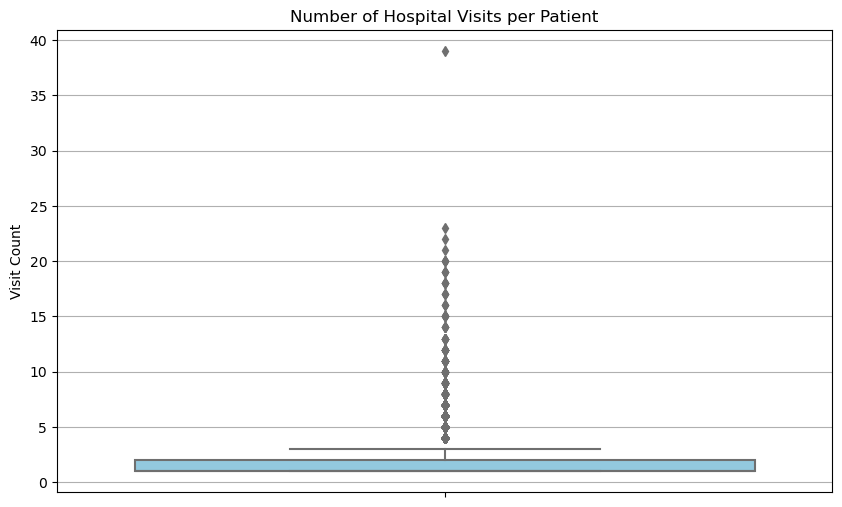

Q1 (25th percentile): 1.0
Q3 (75th percentile): 2.0
IQR (Interquartile Range): 1.0


In [82]:
# Step 1: Count visits per patient
patient_visits = df['patient_nbr'].value_counts()

# Step 2: Convert to a DataFrame for analysis
visit_df = pd.DataFrame({'patient_nbr': patient_visits.index, 'visit_count': patient_visits.values})

# Step 3: Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=visit_df['visit_count'], color='skyblue')
plt.title('Number of Hospital Visits per Patient')
plt.ylabel('Visit Count')
plt.grid(True, axis='y')
plt.show()

# Step 4: Calculate IQR (Interquartile Range)
Q1 = visit_df['visit_count'].quantile(0.25)
Q3 = visit_df['visit_count'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")

In [83]:
visit_df['visit_count'].mean()

1.4884206816694356

Mean and Median are pretty close, but we see *generally* most patients only visit the hospital 1-2 times.

In [84]:
# first checking if they would have multiple visits without readmission, which yes, but not always
df[df['patient_nbr'].isin(visit_df[(visit_df['visit_count']>1)]['patient_nbr'])]['readmit_at_all'].value_counts()

1    22248
0     7496
Name: readmit_at_all, dtype: int64

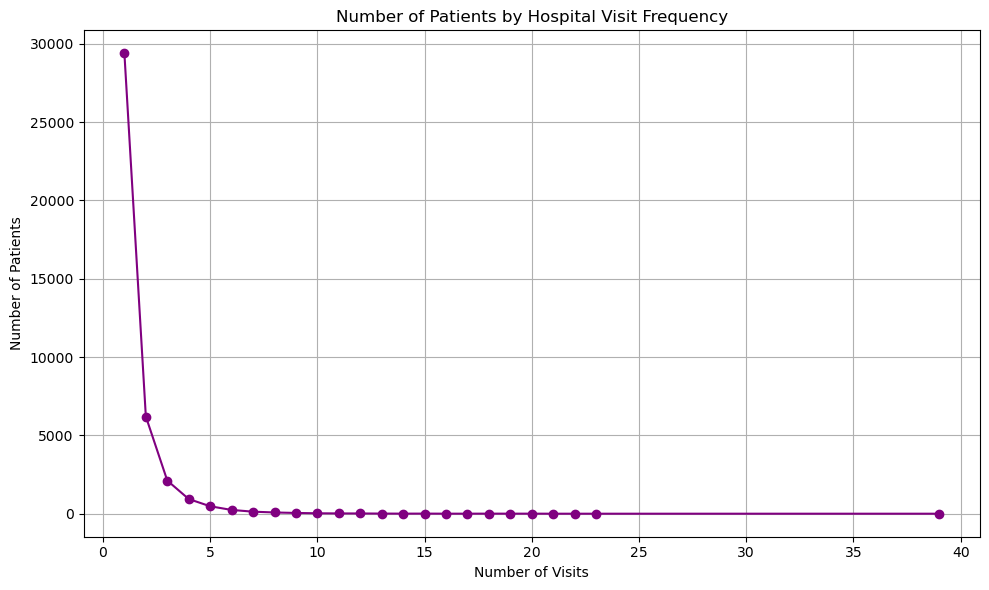

In [85]:
import matplotlib.pyplot as plt

# Step 1: Count visits per patient
patient_visits = df['patient_nbr'].value_counts()

# Step 2: Count how many patients had 1, 2, 3... visits
visit_distribution = patient_visits.value_counts().sort_index()

# Step 3: Plot it
plt.figure(figsize=(10, 6))
plt.plot(visit_distribution.index, visit_distribution.values, marker='o', color='purple')
plt.title('Number of Patients by Hospital Visit Frequency')
plt.xlabel('Number of Visits')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.tight_layout()
plt.show()

In [86]:
visit_df['visit_count'].value_counts()

1     29385
2      6205
3      2115
4       938
5       476
6       241
7       131
8        80
9        49
10       27
11       19
12       16
13        9
15        7
14        5
18        5
19        4
20        4
16        3
17        3
23        1
21        1
22        1
39        1
Name: visit_count, dtype: int64

In [87]:
df[(df['patient_nbr'].isin(visit_df[visit_df['visit_count']==3]['patient_nbr'].sample(1)))]

,patient_nbr,race,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmit_early,readmit_at_all,high_a1c,glucose_high,change,on_meds,gender
44010,102153924,Caucasian,[70-80),2,3,7,4,SP,Emergency/Trauma,8,4,7,0,0,0,410,414,786,8,0,1,0,0,1,1,0
58096,102153924,Caucasian,[70-80),2,1,7,3,BC,Emergency/Trauma,40,0,7,1,0,2,250.8,276,780,7,0,1,1,0,1,1,0
61062,102153924,Caucasian,[70-80),2,2,7,5,SP,Emergency/Trauma,61,0,8,2,0,3,427,780,458,9,0,0,0,0,1,1,0


In [88]:
df = df[(df['patient_nbr'].isin(visit_df[visit_df['visit_count']<=3]['patient_nbr']))]

In [89]:
visit_df[visit_df['visit_count']<=3]['visit_count'].value_counts()

1    29385
2     6205
3     2115
Name: visit_count, dtype: int64

In [90]:
len(df)

48140

In [91]:
df.head()

,patient_nbr,race,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmit_early,readmit_at_all,high_a1c,glucose_high,change,on_meds,gender
20446,20123568,Caucasian,[70-80),1,22,7,7,MC,Other,58,2,15,0,0,0,821,276,285,9,0,0,0,0,1,1,1
20737,20377854,Caucasian,[60-70),2,1,1,3,MC,Other,59,3,11,0,0,0,Other,403,599,6,0,0,0,0,0,1,1
20824,20408121,Caucasian,[90-100),1,1,7,4,MC,Emergency/Trauma,56,1,9,0,0,0,532,428,535,6,0,0,0,0,0,1,1
21083,20542797,Caucasian,[70-80),1,2,7,10,MC,InternalMedicine,68,1,18,0,0,0,682,427,276,6,0,0,0,0,1,1,0
23668,20514150,Caucasian,[60-70),2,1,1,4,MC,Unknown,33,0,11,0,0,0,250.02,428,401,4,1,1,0,0,1,1,1


Because of how patient visits are, when the time comes for train-test-split, I will do it on `patient_nbr` rather than arbitrary rows, so the same patient doesn't end up in both the training and test data.

## Age

In [92]:
# checkpoint 6
# df_copy_6 = wf.checkpoint(df, existing_copy=globals().get('df_copy_6'))

In [93]:
# df = df_copy_6_copy(deep=True)

Encoding age as an ordinal feature

In [94]:
df['age'].value_counts()

[70-80)     12416
[60-70)     10590
[80-90)      8927
[50-60)      7898
[40-50)      4296
[90-100)     1609
[30-40)      1555
[20-30)       676
[10-20)       167
[0-10)          6
Name: age, dtype: int64

In [95]:
age_map = {
    '[0-10)': 0,
    '[10-20)': 1,
    '[20-30)': 2,
    '[30-40)': 3,
    '[40-50)': 4,
    '[50-60)': 5,
    '[60-70)': 6,
    '[70-80)': 7,
    '[80-90)': 8,
    '[90-100)': 9
}

df.loc[:, 'age_ord'] = df['age'].map(age_map)

In [96]:
df.drop('age',axis=1,inplace=True)

In [97]:
df.head(3)

,patient_nbr,race,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmit_early,readmit_at_all,high_a1c,glucose_high,change,on_meds,gender,age_ord
20446,20123568,Caucasian,1,22,7,7,MC,Other,58,2,15,0,0,0,821,276,285,9,0,0,0,0,1,1,1,7
20737,20377854,Caucasian,2,1,1,3,MC,Other,59,3,11,0,0,0,Other,403,599,6,0,0,0,0,0,1,1,6
20824,20408121,Caucasian,1,1,7,4,MC,Emergency/Trauma,56,1,9,0,0,0,532,428,535,6,0,0,0,0,0,1,1,9


## Race

In [98]:
# checkpoint 7
# df_copy_7 = wf.checkpoint(df, existing_copy=globals().get('df_copy_7'))

In [99]:
# df = df_copy_7.copy(deep=True)

In [100]:
df = pd.get_dummies(df, columns=['race'])

In [101]:
df.reset_index(inplace=True,drop=True)

In [102]:
df.head(3)

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmit_early,readmit_at_all,high_a1c,glucose_high,change,on_meds,gender,age_ord,race_AfricanAmerican,race_Caucasian,race_Hispanic,race_Other
0,20123568,1,22,7,7,MC,Other,58,2,15,0,0,0,821,276,285,9,0,0,0,0,1,1,1,7,0,1,0,0
1,20377854,2,1,1,3,MC,Other,59,3,11,0,0,0,Other,403,599,6,0,0,0,0,0,1,1,6,0,1,0,0
2,20408121,1,1,7,4,MC,Emergency/Trauma,56,1,9,0,0,0,532,428,535,6,0,0,0,0,0,1,1,9,0,1,0,0


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48140 entries, 0 to 48139
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   patient_nbr               48140 non-null  int64 
 1   admission_type_id         48140 non-null  int64 
 2   discharge_disposition_id  48140 non-null  int64 
 3   admission_source_id       48140 non-null  int64 
 4   time_in_hospital          48140 non-null  int64 
 5   payer_code                48140 non-null  object
 6   medical_specialty         48140 non-null  object
 7   num_lab_procedures        48140 non-null  int64 
 8   num_procedures            48140 non-null  int64 
 9   num_medications           48140 non-null  int64 
 10  number_outpatient         48140 non-null  int64 
 11  number_emergency          48140 non-null  int64 
 12  number_inpatient          48140 non-null  int64 
 13  diag_1                    48140 non-null  object
 14  diag_2                

# Features for modeling

## IDs

In [116]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmit_early,readmit_at_all,admission_type
20446,72091308,20123568,Caucasian,Female,[70-80),1,22,7,7,MC,Other,58,2,15,0,0,0,821,276,285,9,None,None,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,0,0,NaN
20737,72848634,20377854,Caucasian,Female,[60-70),2,1,1,3,MC,Other,59,3,11,0,0,0,V56,403,599,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,0,0,NaN
20824,73062156,20408121,Caucasian,Female,[90-100),1,1,7,4,MC,Emergency/Trauma,56,1,9,0,0,0,532,428,535,6,None,None,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0,0,NaN
21083,73731852,20542797,Caucasian,Male,[70-80),1,2,7,10,MC,InternalMedicine,68,1,18,0,0,0,682,427,276,6,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,0,0,NaN
23668,80820942,20514150,Caucasian,Female,[60-70),2,1,1,4,MC,Unknown,33,0,11,0,0,0,250.02,428,401,4,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30,1,1,NaN


In [96]:
ids.head()

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


In [111]:
ids[:60]

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


In [118]:
def parse_stacked_mapping(raw_ids):
    # Find header row indices
    header_rows = raw_ids[raw_ids[1] == 'description'].index.tolist()
    header_rows.append(len(raw_ids))  # Add end for slicing

    mappings = {}

    # Iterate over blocks
    for i in range(len(header_rows) - 1):
        start = header_rows[i] + 1
        end = header_rows[i+1]

        var_name = raw_ids.iloc[header_rows[i], 0]  # e.g. 'admission_type_id'
        sub_df = raw_ids.iloc[start:end].dropna()

        # Rename columns
        sub_df.columns = ['code', 'description']
        sub_df = sub_df.astype({'code': int})  # convert code from float to int
        mappings[var_name] = dict(zip(sub_df['code'], sub_df['description']))

    return mappings

In [119]:
# Parse it into a dict of dicts
id_maps = parse_stacked_mapping(ids)

In [122]:
# Now you can map like:
df['admission_type'] = df['admission_type_id'].map(id_maps['admission_type_id'])
df['discharge_disposition'] = df['discharge_disposition_id'].map(id_maps['discharge_disposition_id'])
df['admission_source'] = df['admission_source_id'].map(id_maps['admission_source_id'])

In [145]:
df.head(3)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmit_early,readmit_at_all,admission_type,discharge_disposition,admission_source
20446,72091308,20123568,Caucasian,Female,[70-80),1,22,7,7,MC,Other,58,2,15,0,0,0,821,276,285,9,None,None,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,0,0,Emergency,Discharged/transferred to another rehab fac including rehab units of a hospital .,Emergency Room
20737,72848634,20377854,Caucasian,Female,[60-70),2,1,1,3,MC,Other,59,3,11,0,0,0,V56,403,599,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,0,0,Urgent,Discharged to home,Physician Referral
20824,73062156,20408121,Caucasian,Female,[90-100),1,1,7,4,MC,Emergency/Trauma,56,1,9,0,0,0,532,428,535,6,None,None,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0,0,Emergency,Discharged to home,Emergency Room
